# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
# Отрисовка признаков в разрезе классов
def show_classes_plots(data, list_of_columns, labels, figsize=(15, 20)):
    # Определим количество графиков, чтобы не рисовать пустые 
    result = 0
    for x in list_of_columns:
        d = data[[x]].join(labels).dropna()
        if len(d) > 1:
            result = result+1
    print(f"{result} графиков.")
#     по 3 графика в колонку
    cols = 3
    fig, axes = plt.subplots(
        nrows=int(np.ceil(result/cols)),
        ncols=cols, figsize=figsize)
    i = 0
    for feature in list_of_columns:
        d = data[[feature]].join(labels).dropna()
        if len(d) > 1:
            d.plot(feature,
                   "label",
                   subplots=True,
                   kind="scatter",
                   ax=axes[i // cols, i % cols],
                   s=1,
                   cmap=colors,
                   c=d['label'])
        i = i+1

In [110]:
# Определим количество графиков, чтобы не рисовать пустые 
def number_of_plots(data, list_of_columns, labels):
    result = 0
    for x in range(len(list_of_columns)-1):
        for y in range(x+1, len(list_of_columns)):
            d = data[[list_of_columns[x], list_of_columns[y]]].join(
                labels).dropna()
            if len(d) > 1:
                result = result+1
    print(f"{result} графиков.")
    return result

# Отрисовка пар признаков:
def show_features_plots(data, list_of_columns, labels, figsize =(15,20)):
    v = number_of_plots(
        data=data,
        list_of_columns=list_of_columns,
        labels=labels)
    i = 0
    cols = 3
    fig, axes = plt.subplots(nrows=int(np.ceil(v/cols)),
                             ncols=cols, figsize=figsize)

    for x in range(len(list_of_columns)-1):
        for y in range(x+1, len(list_of_columns)):
#             для отрисовки удаляются поля без данных
            d = data[[list_of_columns[x], list_of_columns[y]]].join(
                labels).dropna()
            if len(d) > 1:
                d.plot(list_of_columns[x],
                       list_of_columns[y],
                       subplots=True,
                       kind="scatter",
                       ax=axes[i // cols, i % cols],
                       s=1,
                       cmap=colors,
                       c=d['label'])
                i = i+1

In [2]:
# данные
data = pd.read_csv("orange_small_churn_data.train")
labels = pd.read_csv("orange_small_churn_labels.train",
                     header=None, names=["label"])

# колонки числовые
numerical = data.columns[:190]
# колонки категориальные
categorical = data.columns[-40:]
# добавляем метки к данным
data = data.join(labels)

In [3]:
data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,label
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN,-1


2. Рассчитайте доли классов `отток` и `не отток`.

In [4]:
n = len(labels)
for c in labels['label'].unique():
    print(f"Доля меток класса {c} равна : {round(sum(labels.label==c)/len(labels)*100,4)} %")

Доля меток класса -1 равна : 92.56 %
Доля меток класса 1 равна : 7.44 %


## Комментарии   к заданию #1:
- Доля класса оттока составляет 7,44 %. Классы сильно не сбалансированы.
- Так как признак-постоянная уже предсказывает классы с точностью (accuracy) 7,44%, модели с худшей точностью нас не интересуют.

3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчитать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, однако анализировать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

### Подсчитаем корреляции Пирсона и Спирмена для каждого признака

In [5]:
import scipy.stats as stats


def correlation_num(data: pd.DataFrame, num_cols: list, label_col: str, corr_func):
    """
    Корреляция между numerical признаками и целевой функцией
    """
    # выделен список для корреляций
    coeff = list()
    # переменная для корреляции
    r = 0
    # для каждого признака numerical
    for x in num_cols:
        # выделяется ряд с данными
        l = data[[x, label_col]].dropna()
        # удвляем ряды с константами
        l = l[l.columns[l.var() != 0]]
        # длиной не меньше, чем 2
        if(len(l) > 1):
            # коэффициент корреляции добавляется в список
            try:
                r, _ = corr_func(l[x], l[label_col])
                if (r is np.nan):
                    r = 0
            except Exception:
                r = 0
        else:
            r = 0
        coeff.append((x, r))
    return coeff

In [6]:
# top 20 Pearson coefficients on numerical data
pearson_numerical = correlation_num(
        data=data,
        num_cols=numerical,
        label_col='label',
        corr_func=stats.pearsonr)

sorted(pearson_numerical, key = lambda x : abs(x[1]), reverse= True)[:10]

[('Var168', -0.13530481183201484),
 ('Var189', -0.12250113863051514),
 ('Var131', 0.09620190019693237),
 ('Var188', 0.09523814370972003),
 ('Var53', 0.07904549300956841),
 ('Var111', 0.07695638777234623),
 ('Var19', 0.0742021272673068),
 ('Var7', -0.07243678070669146),
 ('Var73', -0.06955028174151245),
 ('Var177', 0.060160295601471674)]

In [7]:
# top 20 Spearman coefficients on numerical data
spearman_numerical = correlation_num(
        data=data,
        num_cols=numerical,
        label_col='label',
        corr_func=stats.spearmanr)

sorted(spearman_numerical, key = lambda x : abs(x[1]), reverse= True)[:10]

[('Var189', -0.13018181300325132),
 ('Var53', 0.11991792954653673),
 ('Var3', 0.09586357870042134),
 ('Var188', 0.09537478280965711),
 ('Var92', -0.09476401799309504),
 ('Var168', -0.09106916921707515),
 ('Var74', -0.08998550821618902),
 ('Var129', 0.08610988544198514),
 ('Var13', -0.083523963317883),
 ('Var7', -0.08070510474939924)]

In [8]:
print(f"Длины рядов корреляций {len(pearson_numerical)}, {len(spearman_numerical)}.")

Длины рядов корреляций 190, 190.


In [9]:
s = stats.spearmanr([x[1] for x in pearson_numerical],[x[1] for x in spearman_numerical])
print(s)
p = stats.pearsonr([x[1] for x in pearson_numerical],[x[1] for x in spearman_numerical])
print(p)

SpearmanrResult(correlation=0.7135950122385681, pvalue=7.115407567937305e-31)
(0.7142602647536898, 5.925356695140711e-31)


Комментарии:

- Хоть имеется некая корреляция между коэффициентами (0,71) и это якобы говорит, что они одинаково видят линейную ваимосвязь признаков с ответами. Топ 10 "коррелирующих признаков" отличаются. Это уже говорит о бессмысленности кэффициентов корреляции при сравнении вещественных признаков с дискретной целевой функцией.
- Считая корреляцию мы считали некую линейную взаимосвязь признака с ответом. Если предположить, что линейность имеет силу в предсказании, то ее стоит проверить на кроссвалидации.

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [48]:
from matplotlib.colors import ListedColormap
colors = ListedColormap(['green', 'red'])

In [103]:
# Удалим все нулевые коэффициенты
zeros = 0
for x in spearman_numerical:
    if x[1] == 0:
        zeros = zeros+1

spearman_numerical = sorted(
    spearman_numerical, key=lambda x: abs(x[1]), reverse=True)[:len(spearman_numerical)-zeros]

top_numerical = [y[0] for y in spearman_numerical[:20]]
rand_numerical = data.columns[np.random.randint(0, len(numerical), 10)]
worst_numerical = [y[0] for y in spearman_numerical[-10:]]

Распределения в разрезе классов

20 графиков.


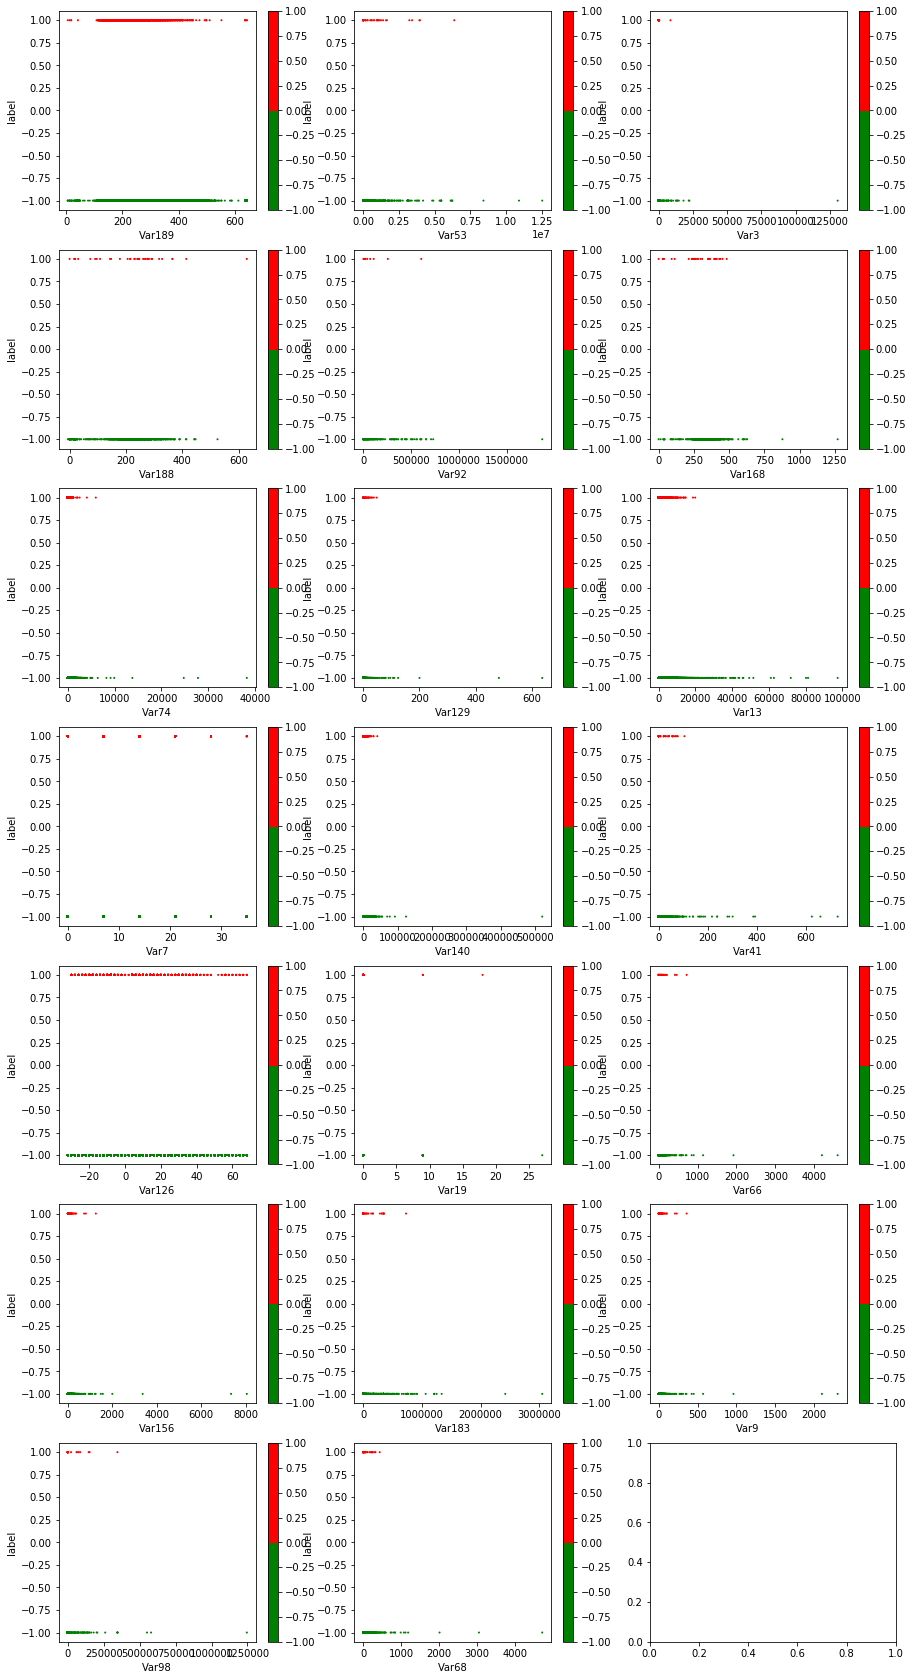

In [102]:
show_classes_plots(data=data,
                   list_of_columns=top_numerical,
                   labels=labels,
                   figsize=(15, 30))

Отобразите объекты в координатах пар признаков

81 графиков.


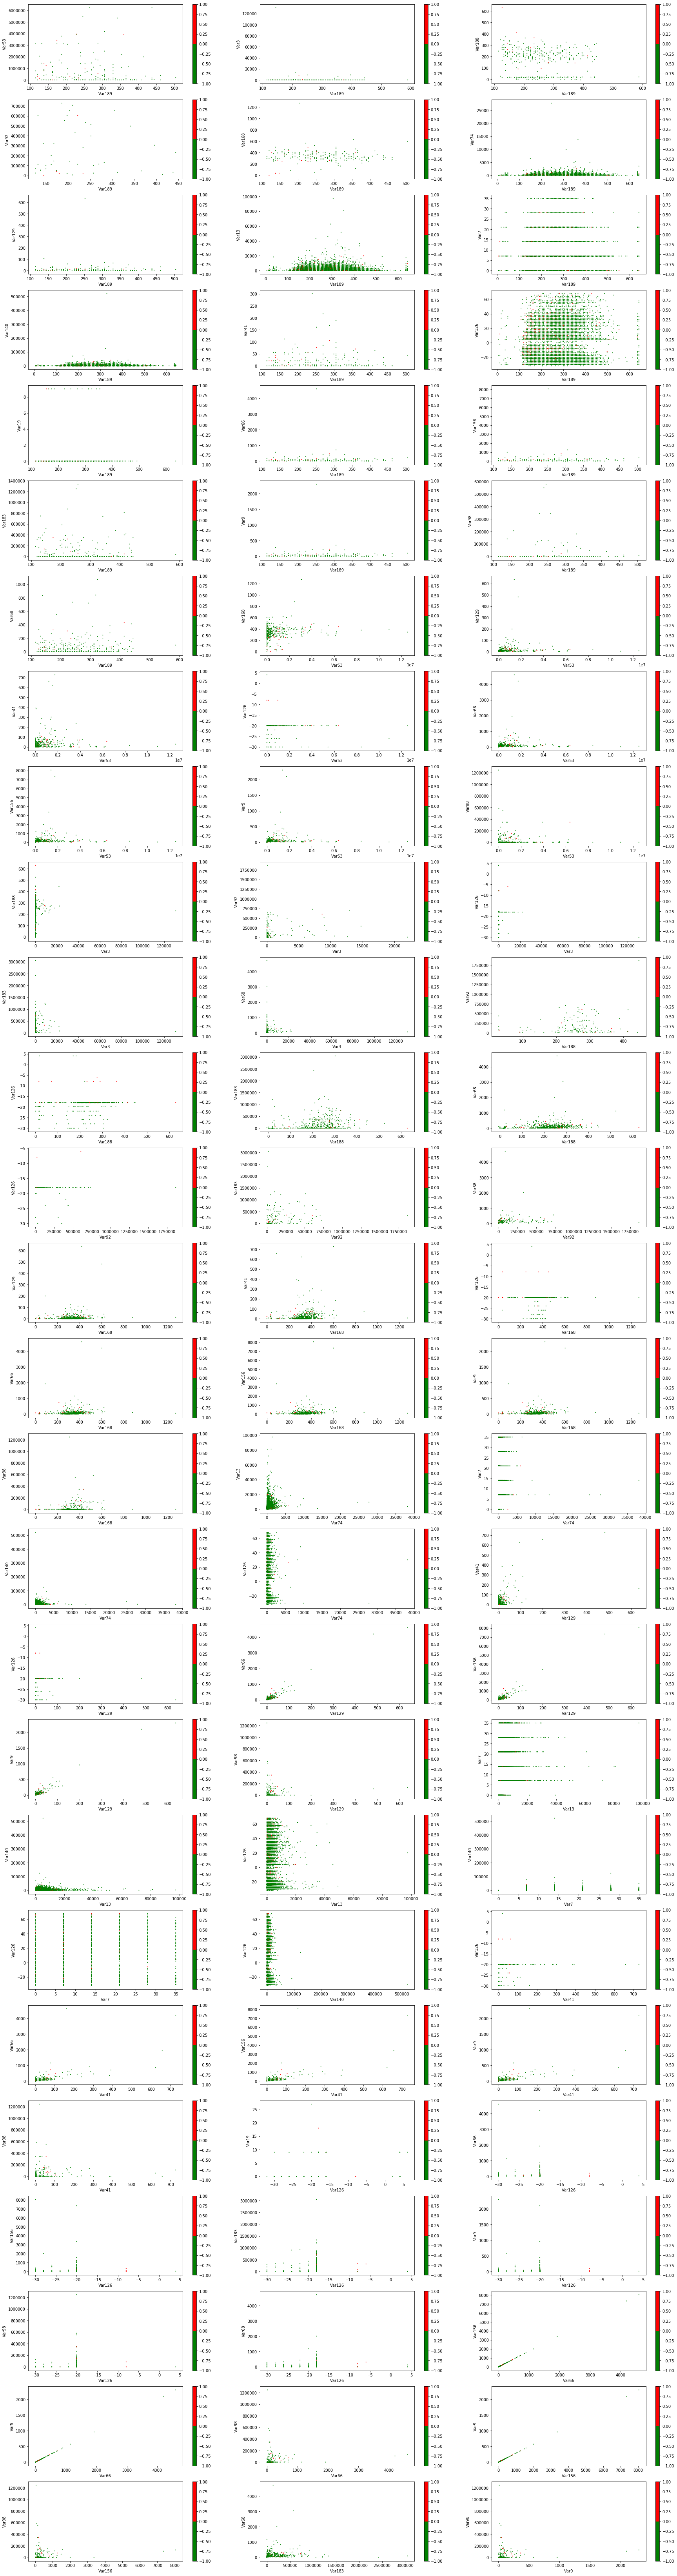

In [106]:
show_features_plots(data=data,
           list_of_columns=top20_numerical,
           labels=labels,
           figsize = (30,120))

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

9 графиков.


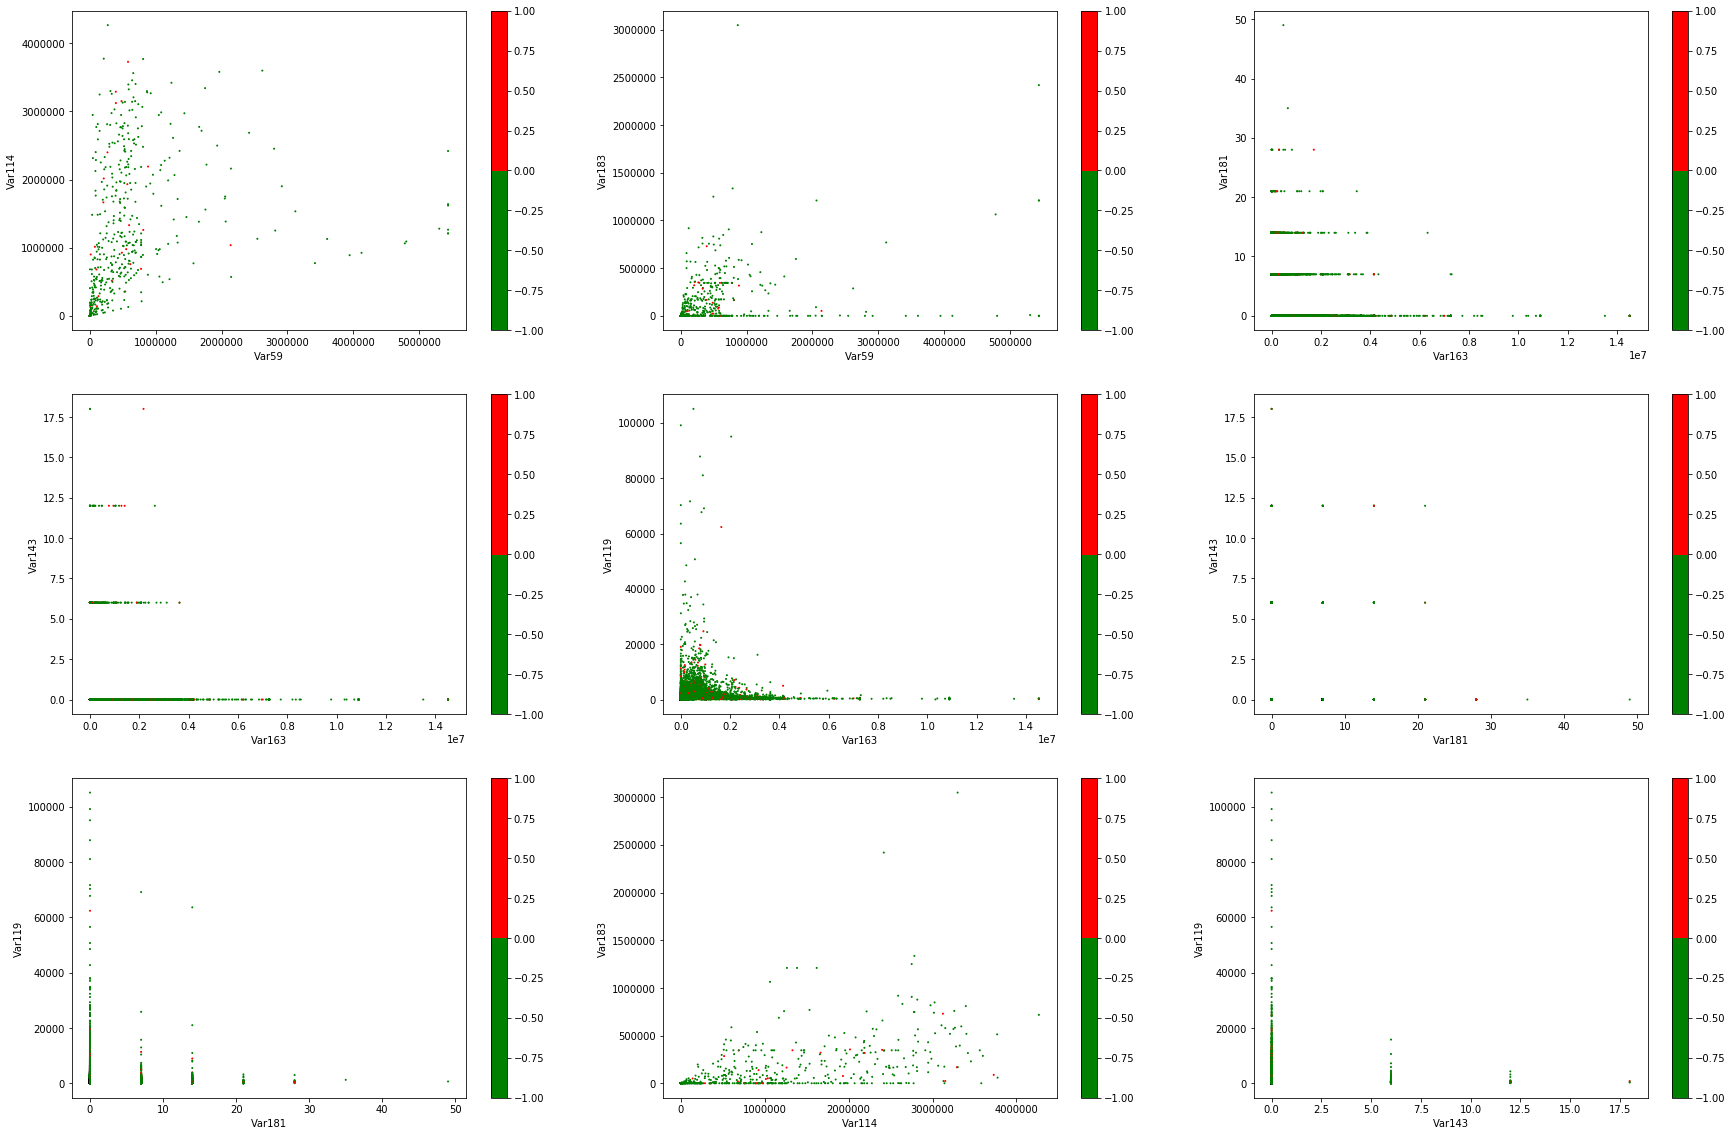

In [99]:
show_features_plots(data=data,
           list_of_columns=rand_numerical,
           labels=labels,
           figsize=(30, 20))

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

16 графиков.


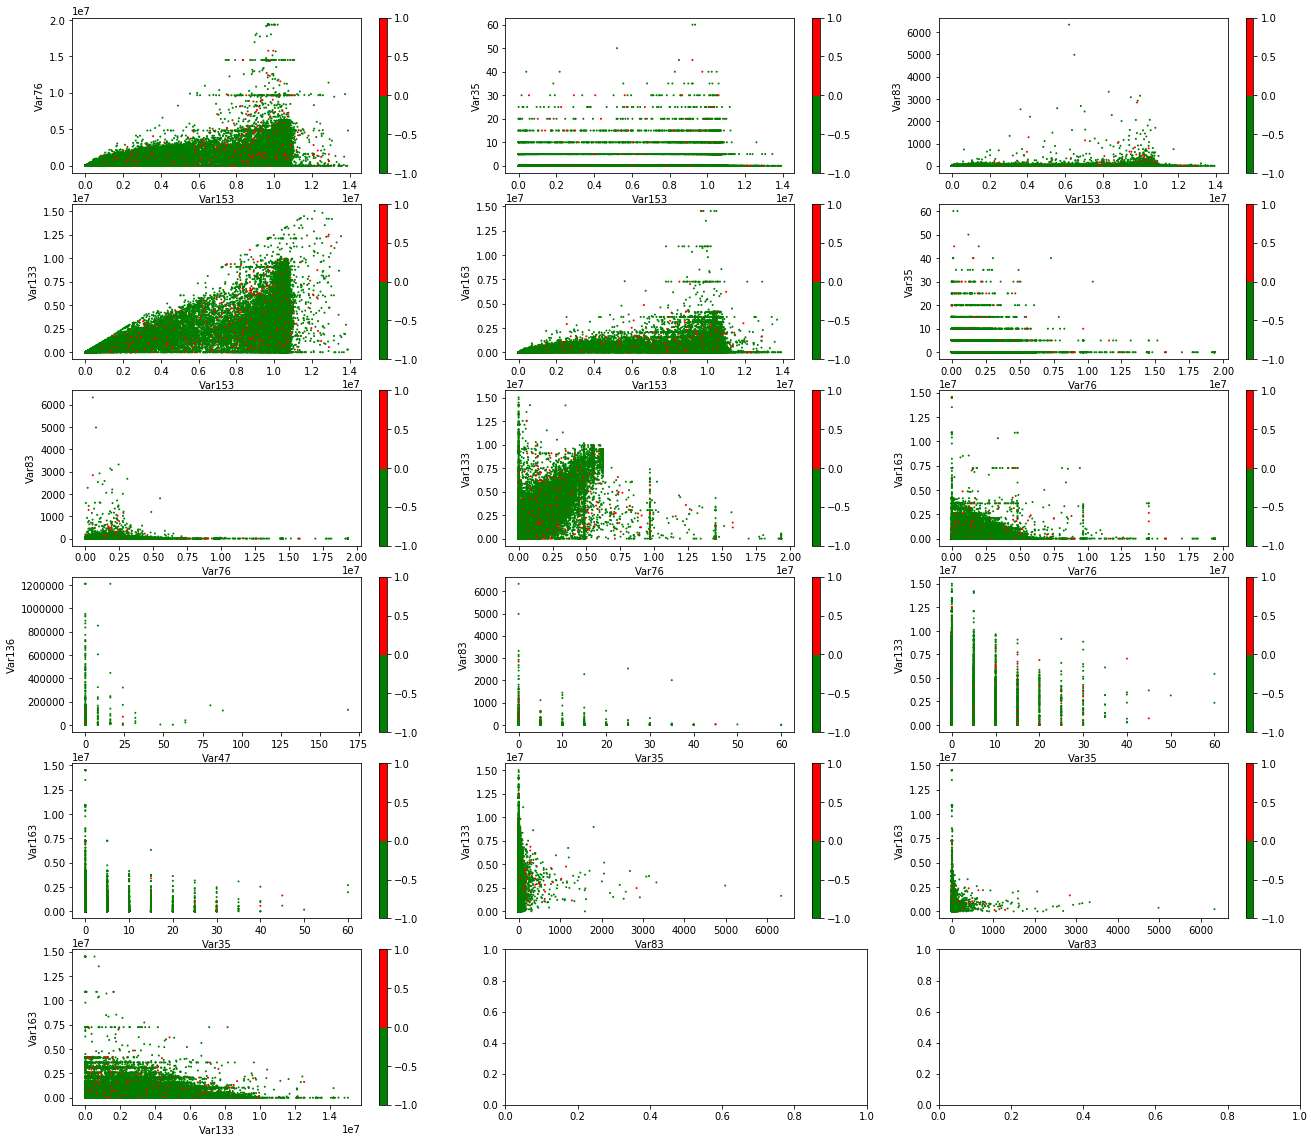

In [80]:
show_features_plots(data=data,
                    list_of_columns=worst_numerical,
                    labels=labels,
                    figsize=(22, 20))

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?